In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [2]:
# Generate random data for the dataset
num_records = 4000

sponsor_ids = list(range(1, num_records + 1))
sponsor_names = ['Sponsor ' + str(i) for i in sponsor_ids]
industries = ['Technology', 'Healthcare', 'Finance', 'Wellness', 'Automotive', 'Retail']
company_sizes = ['Large', 'Medium', 'Small']
package_types = ['Title Sponsor', 'Co-Sponsor', 'Associate Sponsor']
sponsorship_amounts = [random.randint(10000, 100000) for _ in range(num_records)]
duration_months = [random.randint(1, 12) for _ in range(num_records)]
marketing_activities = ['Logo placement', 'Social media mentions', 'Booth space', 'Promotional materials']
event_ids = list(range(101, 101 + num_records))
event_names = ['Event ' + str(i) for i in event_ids]
event_types = ['Conference', 'Seminar', 'Workshop', 'Exhibition']
event_dates = [(datetime.now() + timedelta(days=random.randint(30, 365))).strftime('%Y-%m-%d') for _ in range(num_records)]
event_months = [datetime.strptime(date, '%Y-%m-%d').month for date in event_dates]
attendee_demographics = ['IT professionals', 'Healthcare providers', 'Finance professionals', 'Tech enthusiasts', 'General public']
roi_metrics = [round(random.uniform(2.0, 5.0), 1) for _ in range(num_records)]
feedback = ['Positive', 'Neutral', 'Negative']

# Create a DataFrame using the generated data
data = {
    'Sponsor ID': sponsor_ids,
    'Sponsor Name': sponsor_names,
    'Industry': np.random.choice(industries, num_records),
    'Company Size': np.random.choice(company_sizes, num_records),
    'Package Type': np.random.choice(package_types, num_records),
    'Sponsorship Amount': sponsorship_amounts,
    'Duration (months)': duration_months,
    'Marketing Activities': np.random.choice(marketing_activities, num_records),
    'Event ID': event_ids,
    'Event Name': event_names,
    'Event Type': np.random.choice(event_types, num_records),
    'Event Date': event_dates,
    'Event Month': event_months,
    'Attendee Demographics': np.random.choice(attendee_demographics, num_records),
    'ROI Metrics': roi_metrics,
    'Feedback': np.random.choice(feedback, num_records)
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
# df.to_csv('random_sponsorship_data.csv', index=False)

print('Random dataset generated and saved to random_sponsorship_data.csv')


Random dataset generated and saved to random_sponsorship_data.csv


In [3]:
df = pd.read_csv('random_sponsorship_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sponsor ID             4000 non-null   int64  
 1   Sponsor Name           4000 non-null   object 
 2   Industry               4000 non-null   object 
 3   Company Size           4000 non-null   object 
 4   Package Type           4000 non-null   object 
 5   Sponsorship Amount     4000 non-null   int64  
 6   Duration (months)      4000 non-null   int64  
 7   Marketing Activities   4000 non-null   object 
 8   Event ID               4000 non-null   int64  
 9   Event Name             4000 non-null   object 
 10  Event Type             4000 non-null   object 
 11  Event Date             4000 non-null   object 
 12  Event Month            4000 non-null   int64  
 13  Attendee Demographics  4000 non-null   object 
 14  ROI Metrics            4000 non-null   float64
 15  Feed

In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [6]:
df.head()

,Sponsor ID,Sponsor Name,Industry,Company Size,Package Type,Sponsorship Amount,Duration (months),Marketing Activities,Event ID,Event Name,Event Type,Event Date,Event Month,Attendee Demographics,ROI Metrics,Feedback
0,1,Sponsor 1,Retail,Small,Co-Sponsor,46317,11,Social media mentions,101,Event 101,Conference,2025-03-01,3,Tech enthusiasts,4.6,Neutral
1,2,Sponsor 2,Retail,Large,Title Sponsor,62925,3,Booth space,102,Event 102,Exhibition,2025-03-17,3,IT professionals,4.3,Neutral
2,3,Sponsor 3,Wellness,Small,Title Sponsor,41705,9,Logo placement,103,Event 103,Conference,2025-01-10,1,IT professionals,3.2,Neutral
3,4,Sponsor 4,Healthcare,Small,Associate Sponsor,13480,5,Logo placement,104,Event 104,Exhibition,2024-12-09,12,Finance professionals,4.6,Positive
4,5,Sponsor 5,Finance,Medium,Associate Sponsor,43839,2,Logo placement,105,Event 105,Seminar,2025-02-12,2,IT professionals,3.9,Positive


In [7]:
df.describe()

,Sponsor ID,Sponsorship Amount,Duration (months),Event ID,Event Month,ROI Metrics
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,2000.500000,55222.295000,6.522750,2100.500000,6.66050,3.491275
std,1154.844867,25836.201811,3.460199,1154.844867,3.52063,0.878285
min,1.000000,10018.000000,1.000000,101.000000,1.00000,2.000000
25%,1000.750000,33022.250000,3.000000,1100.750000,3.00000,2.700000
50%,2000.500000,55966.000000,7.000000,2100.500000,7.00000,3.500000
75%,3000.250000,77513.250000,10.000000,3100.250000,10.00000,4.300000
max,4000.000000,99998.000000,12.000000,4100.000000,12.00000,5.000000


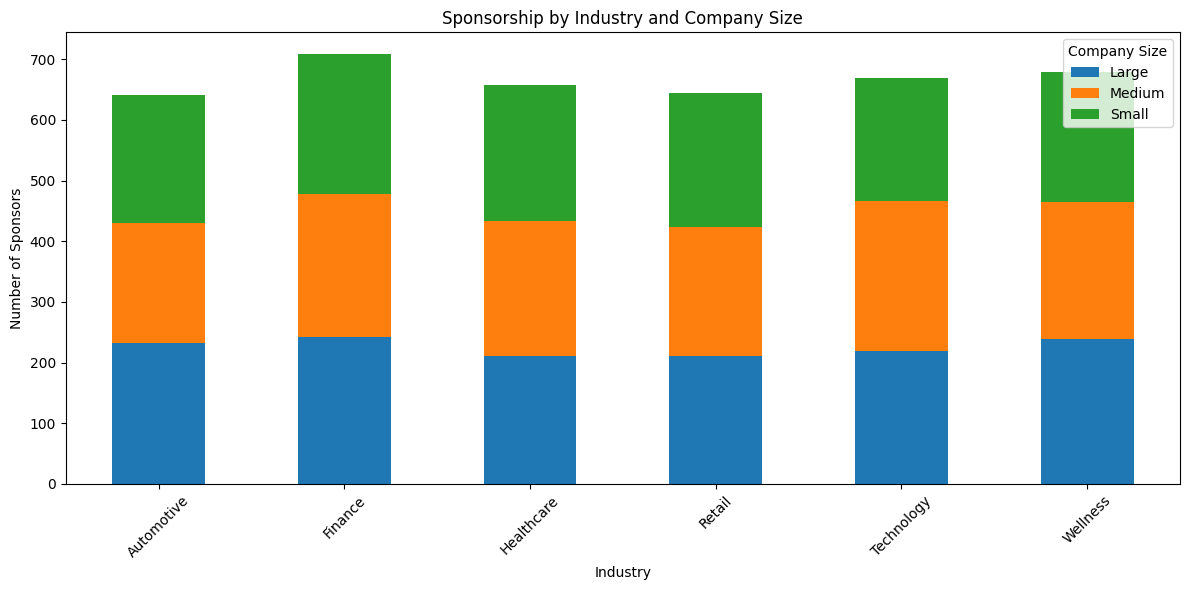

In [8]:
# create a graph grouped by industry and company size
df_grouped = df.groupby(['Industry', 'Company Size']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Industry and Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

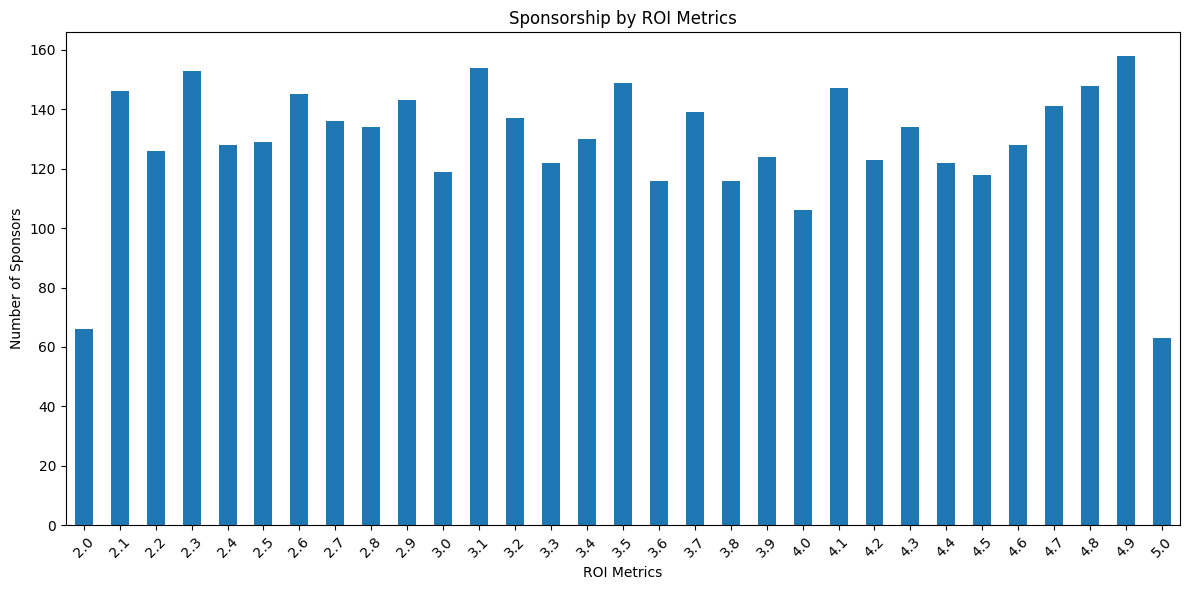

In [9]:
# make graph with respect o ROI metrics
df_grouped = df.groupby('ROI Metrics').size()
df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Sponsorship by ROI Metrics')
plt.xlabel('ROI Metrics')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



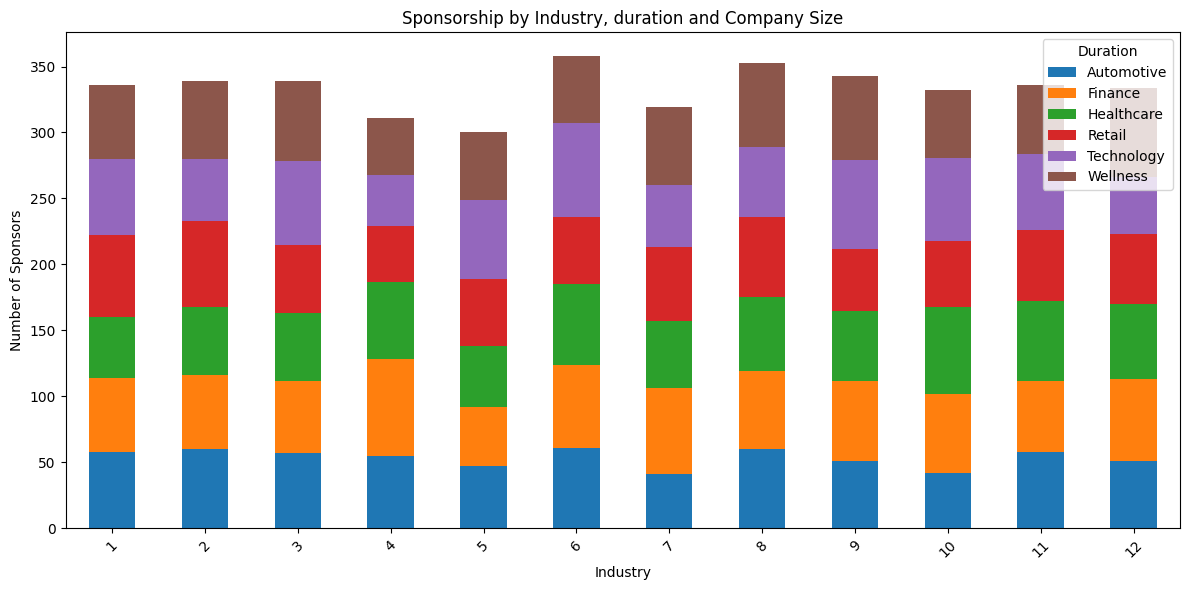

In [10]:
 # create a graph grouped by industry and company size
df_grouped = df.groupby(['Duration (months)', 'Industry']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Industry, duration and Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.tight_layout()
plt.show()

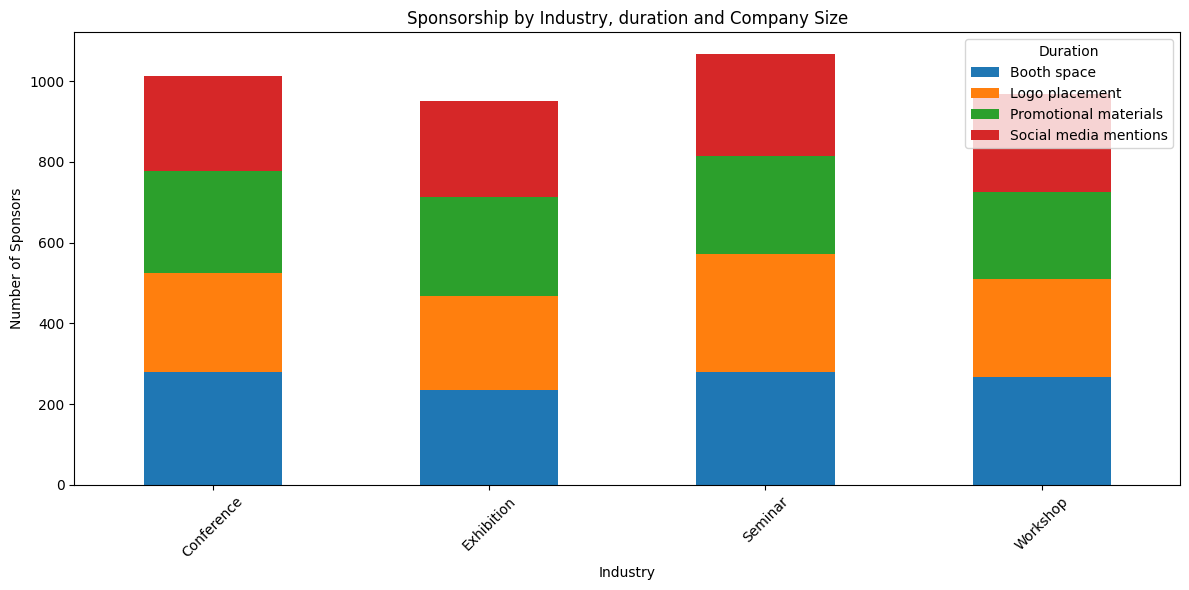

In [11]:
df_grouped = df.groupby(['Event Type', 'Marketing Activities']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Industry, duration and Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.tight_layout()
plt.show()

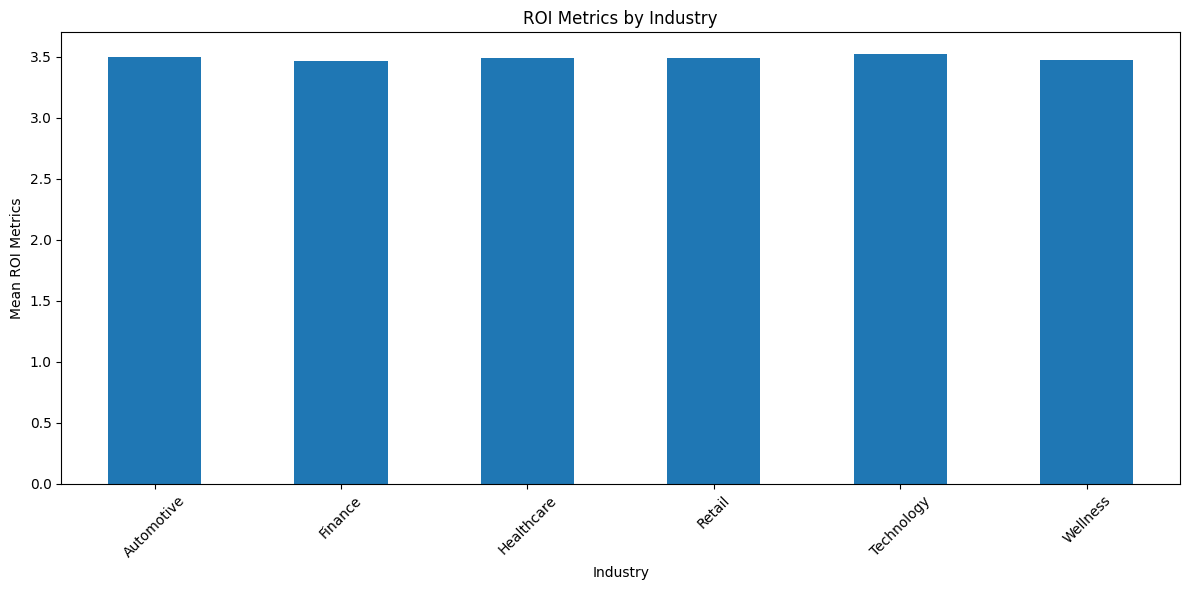

In [12]:
#plot between industry and mean of ROI metrics
df_grouped = df.groupby('Industry')['ROI Metrics'].mean()
df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('ROI Metrics by Industry')
plt.xlabel('Industry')
plt.ylabel('Mean ROI Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


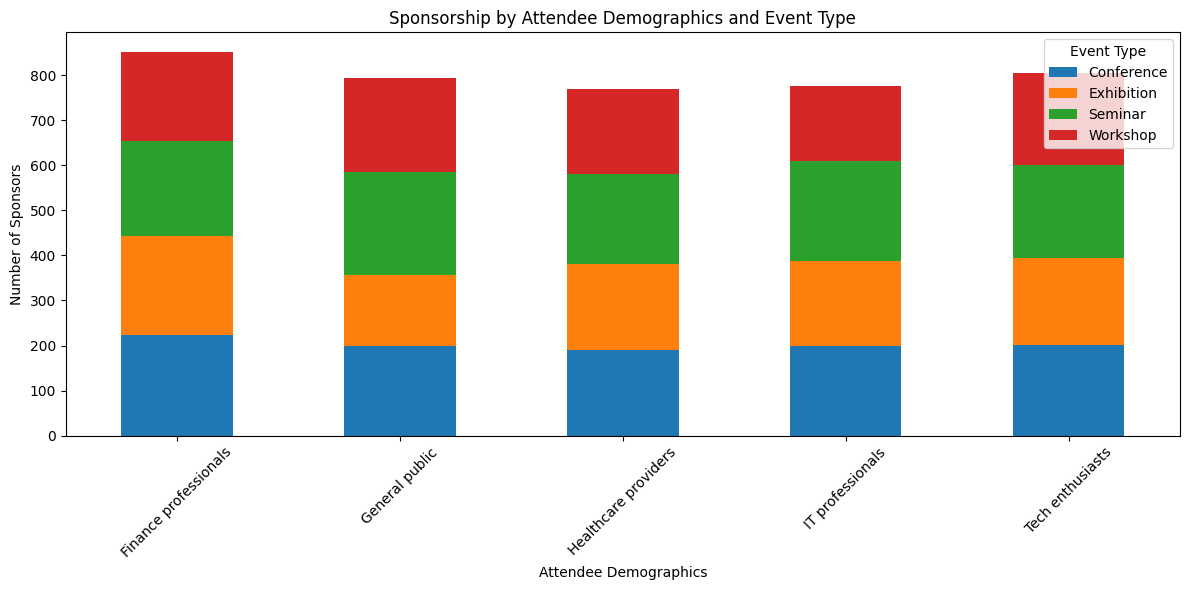

In [13]:
df_grouped = df.groupby(['Attendee Demographics', 'Event Type']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Attendee Demographics and Event Type')
plt.xlabel('Attendee Demographics')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

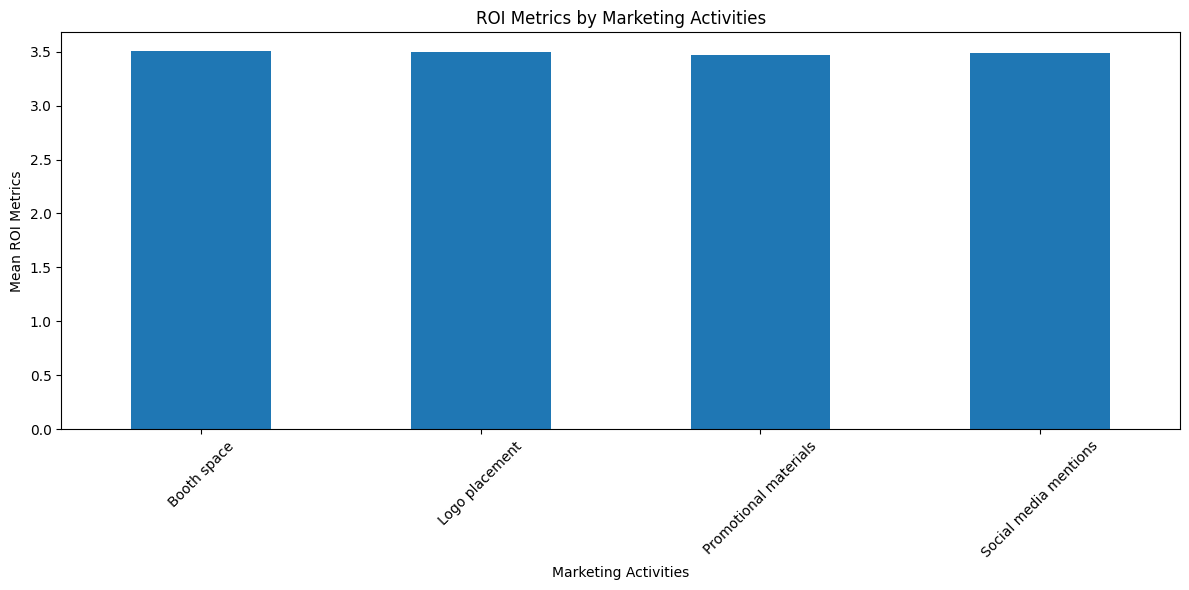

In [14]:
#  make a graph between marketing activities and roi
df_grouped = df.groupby('Marketing Activities')['ROI Metrics'].mean()
df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('ROI Metrics by Marketing Activities')
plt.xlabel('Marketing Activities')
plt.ylabel('Mean ROI Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

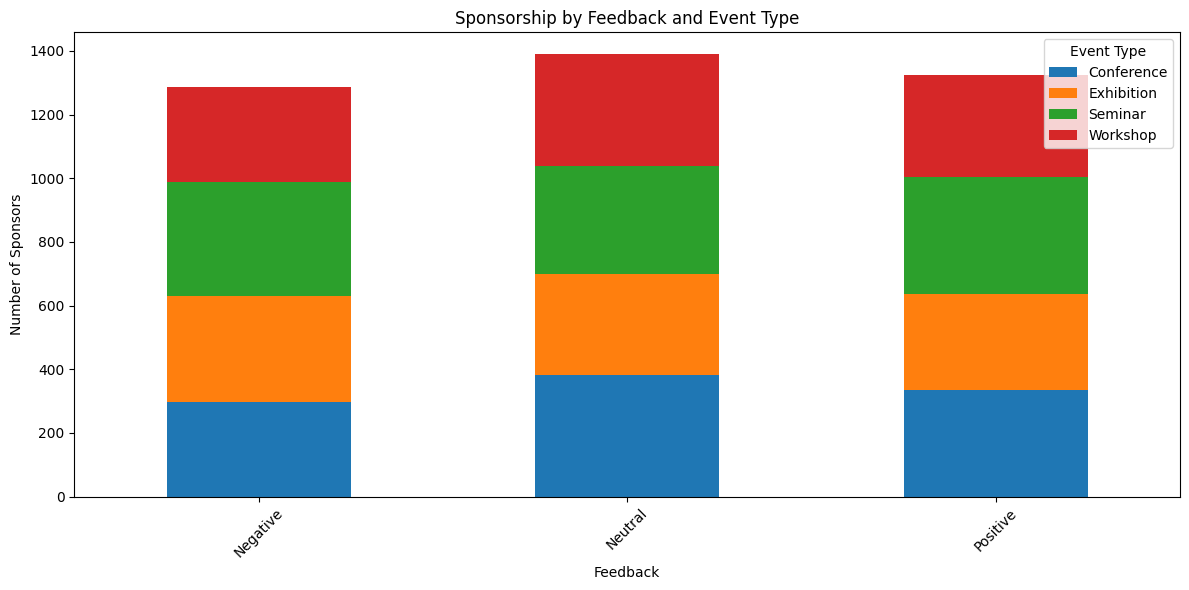

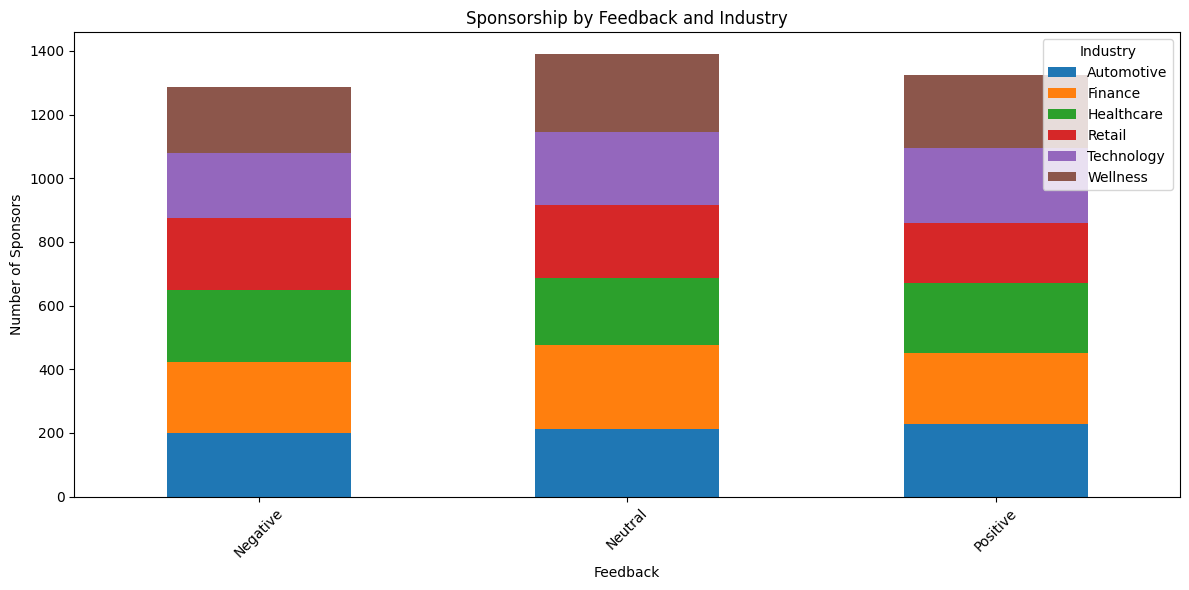

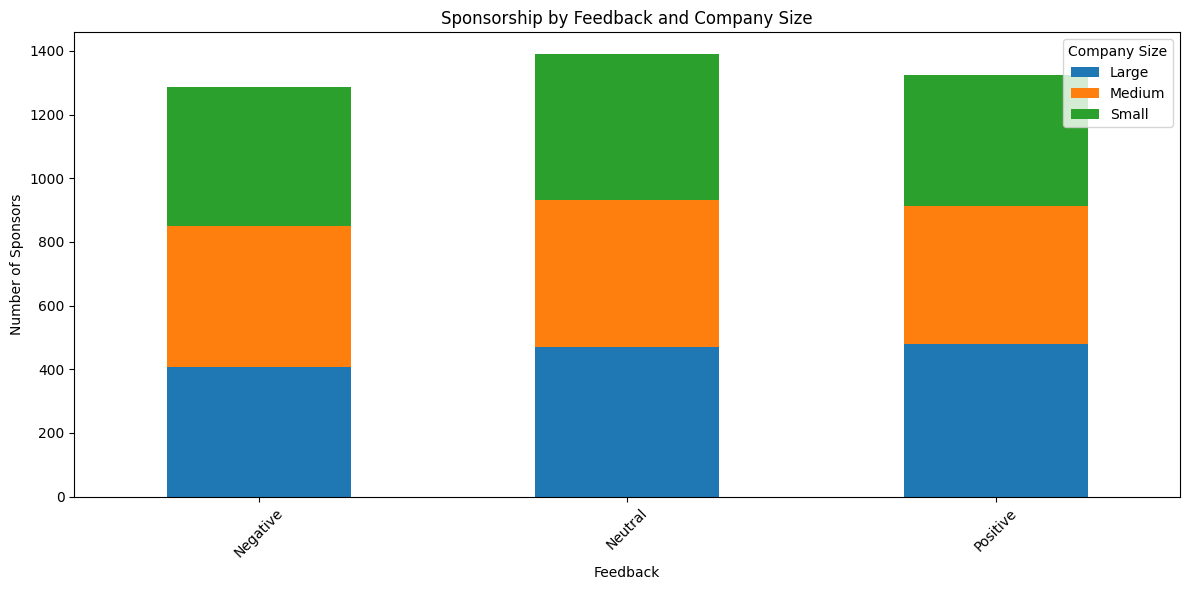

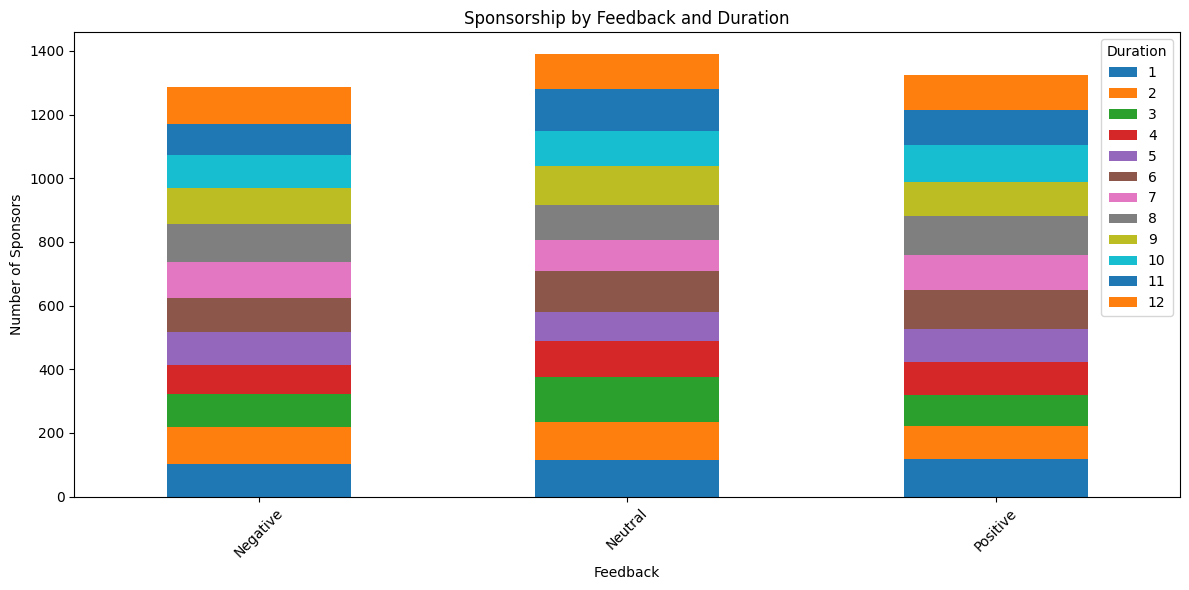

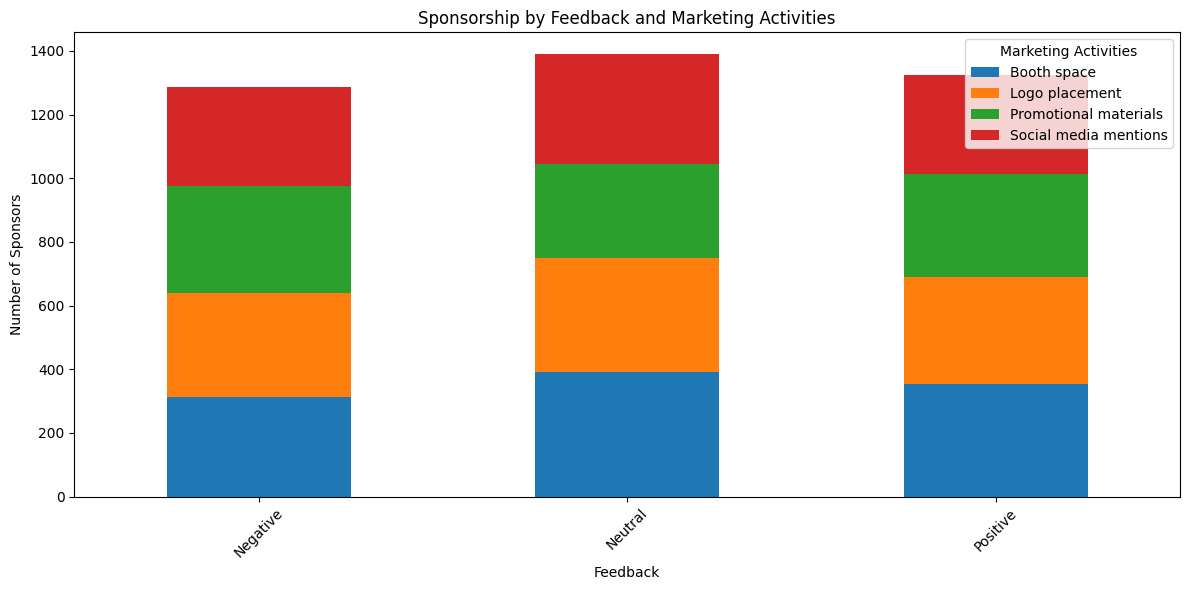

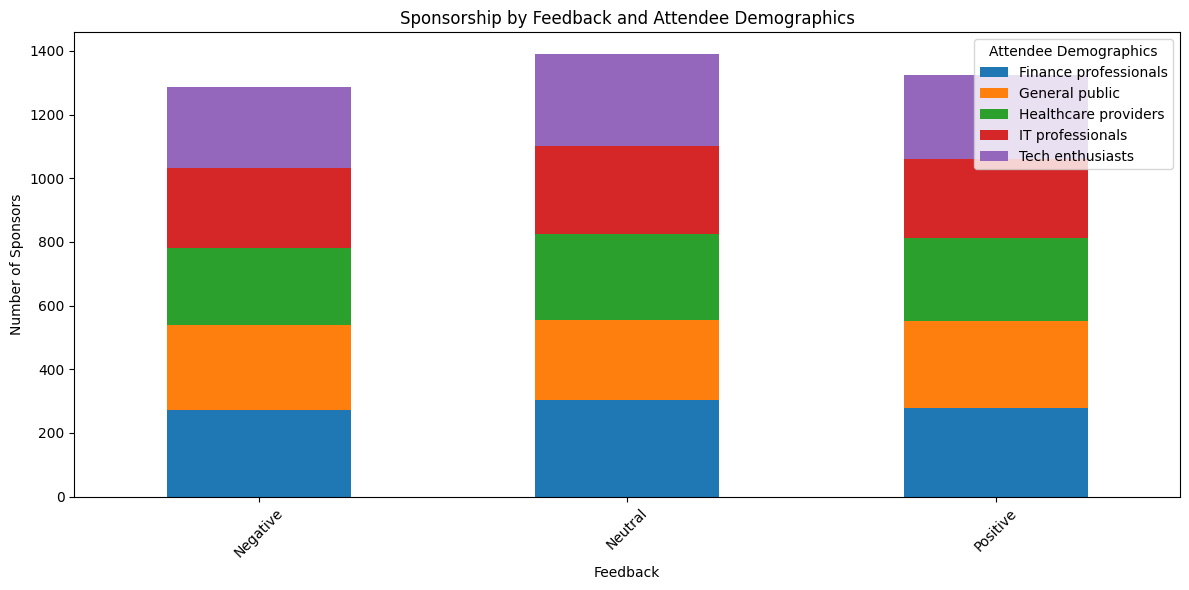

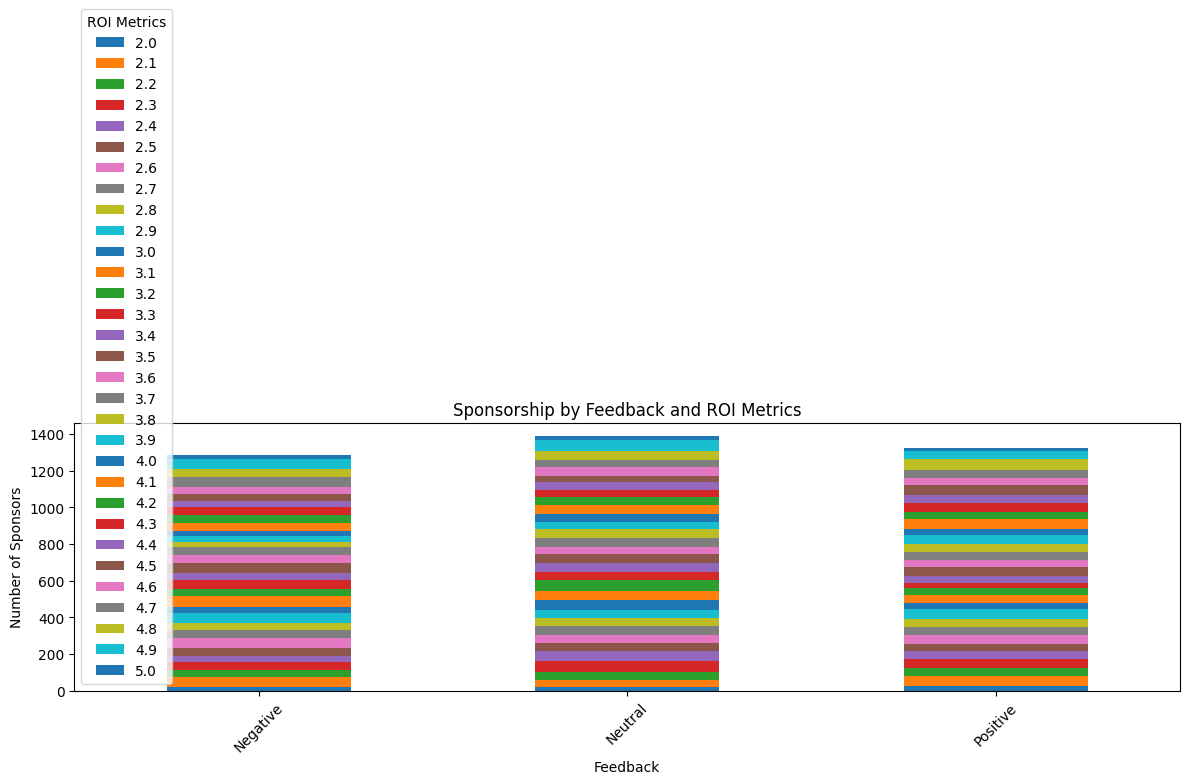

In [15]:
# now make alll the graphs with respect to feedback that u feel can be apt
df_grouped = df.groupby(['Feedback', 'Event Type']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Event Type')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'Industry']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Industry')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'Company Size']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Company Size')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'Duration (months)']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Duration')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Duration')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'Marketing Activities']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Marketing Activities')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Marketing Activities')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'Attendee Demographics']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and Attendee Demographics')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='Attendee Demographics')
plt.tight_layout()
plt.show()

df_grouped = df.groupby(['Feedback', 'ROI Metrics']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sponsorship by Feedback and ROI Metrics')
plt.xlabel('Feedback')
plt.ylabel('Number of Sponsors')
plt.xticks(rotation=45)
plt.legend(title='ROI Metrics')
plt.tight_layout()
plt.show()




